In [1]:
import numpy as np
import pandas as pd 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

training_array = np.array(train,dtype='float32')
testing_array = np.array(test,dtype = 'float32')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



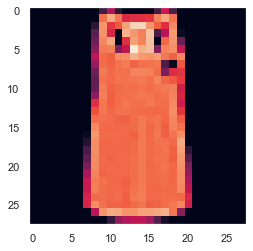

The image is for : T-shirt/top


In [2]:
i = random.randint(1,60000)
plt.figure()
plt.imshow(training_array[i,1:].reshape(28,28))
plt.grid(False)
plt.show()
label = int(training_array[i,0])
print(f'The image is for : {class_names[label]}')

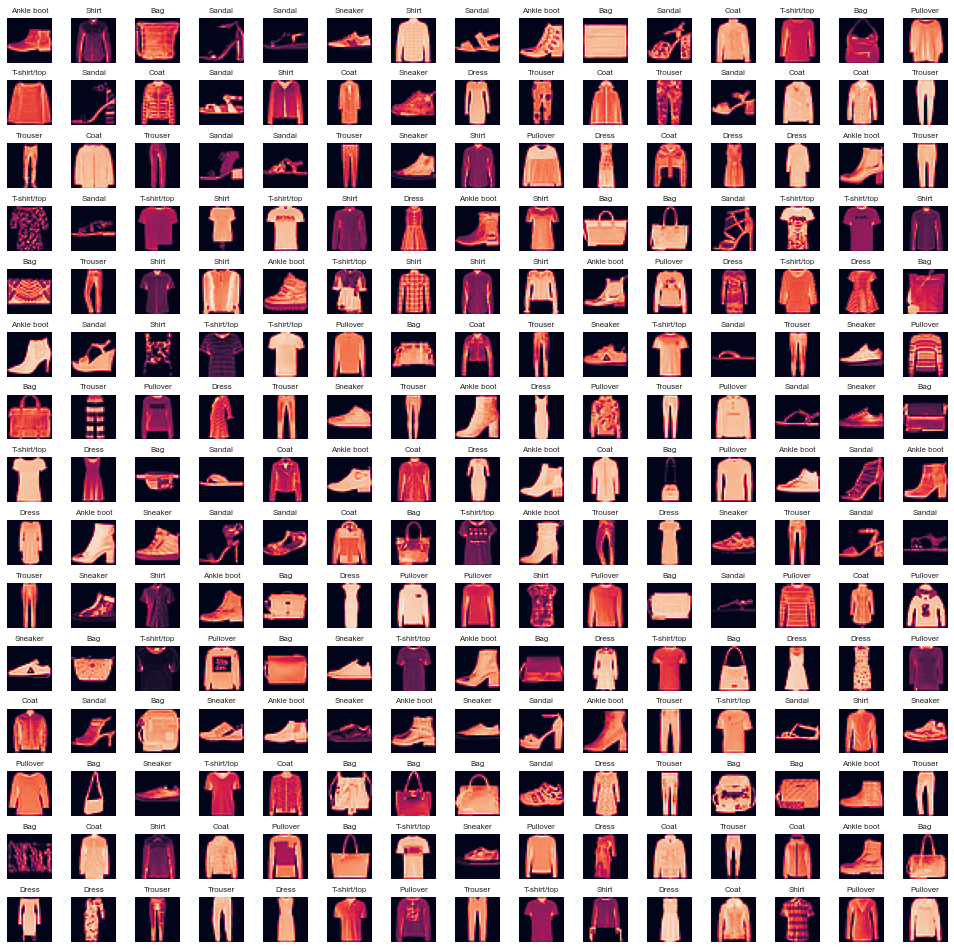

In [3]:
W_grid = 15
L_grid = 15

# subplot return the figure and axes object
# And by using axes object we can plot specific figure at various location
fig , axes = plt.subplots(L_grid,W_grid,figsize=(17,17))  
axes = axes.ravel()          #Flaten the 15 * 15 matrix into 255 array 


n_training = len(training_array)  #get the length of training dataset


for i in np.arange(0,L_grid*W_grid):
    
    index = np.random.randint(0,n_training)
    axes[i].imshow(training_array[index,1:].reshape(28,28))
    axes[i].set_title(class_names[int(training_array[index,0])],fontsize=8)
    axes[i].axis('off')
    
    
plt.subplots_adjust(hspace=0.4)

In [4]:
X_train = training_array[:,1:]/255
y_train = training_array[:,0]

X_test = testing_array[:,1:]/255
y_test = testing_array[:,0]

In [5]:
from sklearn.model_selection import train_test_split

X_train ,X_validate , y_train,y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state = 12345)

In [6]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_validate = X_validate.reshape(X_validate.shape[0],28,28,1)

In [7]:
print(f'shape of X train : {X_train.shape}')
print(f'shape of X test : {X_test.shape}')
print(f'shape of X validate : {X_validate.shape}')

shape of X train : (48000, 28, 28, 1)
shape of X test : (10000, 28, 28, 1)
shape of X validate : (12000, 28, 28, 1)


In [8]:
print(f'shape of y train : {y_train.shape}')
print(f'shape of y test : {y_test.shape}')
print(f'shape of y validate : {y_validate.shape}')

shape of y train : (48000,)
shape of y test : (10000,)
shape of y validate : (12000,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_validate = to_categorical(y_validate,num_classes=10)

In [11]:
print(f'shape of y train : {y_cat_train.shape}')
print(f'shape of y test : {y_cat_test.shape}')
print(f'shape of y validate : {y_cat_validate.shape}')

shape of y train : (48000, 10)
shape of y test : (10000, 10)
shape of y validate : (12000, 10)


## **Start Building CNN Models**

In [12]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten(input_shape=(28, 28)))

model.add(Rescaling(scale=1./255, offset=0.0)), # a layer to rescale an input in the [0, 255] range to be in the [0, 1] range


# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu', input_shape=(784,)))

model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

opt = Adam(learning_rate=0.001)


# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
rescaling (Rescaling)        (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                294976    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [14]:
early_stopping = EarlyStopping(monitor='val_loss',patience=1)

In [15]:
model.fit(X_train,
         y_cat_train,
         epochs=30,
          verbose=1,
         validation_data=(X_validate,y_cat_validate),
         callbacks=[early_stopping])

Epoch 1/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.9940 - accuracy: 0.6215 - val_loss: 0.6105 - val_accuracy: 0.7541
Epoch 2/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.6540 - accuracy: 0.7546 - val_loss: 0.5223 - val_accuracy: 0.7894
Epoch 3/30
1500/1500 [==============================] - 17s 12ms/step - loss: 0.5888 - accuracy: 0.7796 - val_loss: 0.4874 - val_accuracy: 0.8053
Epoch 4/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5469 - accuracy: 0.7960 - val_loss: 0.4655 - val_accuracy: 0.8196
Epoch 5/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5204 - accuracy: 0.8097 - val_loss: 0.4477 - val_accuracy: 0.8285
Epoch 6/30
1500/1500 [==============================] - 17s 12ms/step - loss: 0.4947 - accuracy: 0.8211 - val_loss: 0.4246 - val_accuracy: 0.8380
Epoch 7/30
1500/1500 [==============================] - 17s 12ms/step - loss: 0.4707 - accuracy: 0.8328 - val_loss: 0.3926 -

In [16]:
model_history = pd.DataFrame(model.history.history)
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.994048,0.621542,0.610519,0.754083
1,0.653975,0.754562,0.522350,0.789417
2,0.588759,0.779583,0.487429,0.805333
3,0.546851,0.795979,0.465526,0.819583
4,0.520422,0.809729,0.447742,0.828500
5,0.494653,0.821083,0.424573,0.838000
6,0.470661,0.832833,0.392649,0.857417
7,0.446094,0.842875,0.373351,0.865250
8,0.422726,0.851354,0.363608,0.867083
9,0.405669,0.857146,0.348270,0.873417


<AxesSubplot:>

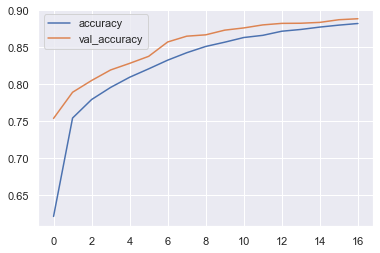

In [17]:
model_history[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

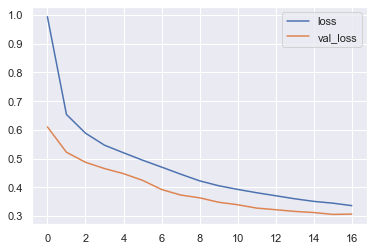

In [18]:
model_history[['loss','val_loss']].plot()

In [19]:
evalution = model.evaluate(X_test,y_cat_test)
print(f'Test Accuracy : {evalution[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.3052 - accuracy: 0.8902
Test Accuracy : 0.8902000188827515


In [20]:
predict_class = model.predict_classes(X_test)

C:\Users\giann\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
predict_class.shape

(10000,)

In [22]:
i = random.randint(0,predict_class.shape[0])
print(class_names[predict_class[i]])
print(class_names[int(y_test[i])])

Bag
Shirt


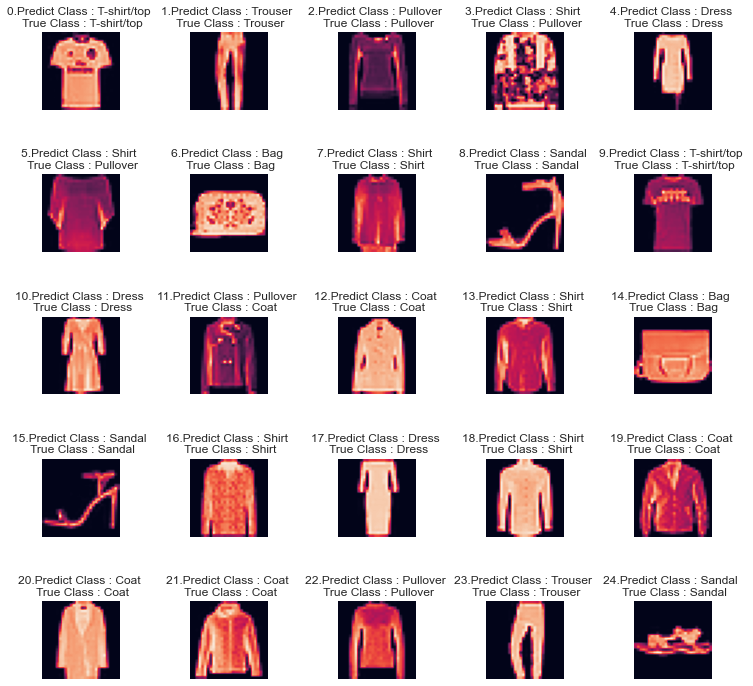

In [23]:
w_gird = 5
l_gird = 5

fig,axes = plt.subplots(l_gird,w_gird,figsize=(12,12))

axes = axes.ravel()

for i in np.arange(0,l_gird*w_gird):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f'{i}.Predict Class : {class_names[predict_class[i]]} \n True Class : {class_names[int(y_test[i])]}')
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.9,hspace=0.7)

<AxesSubplot:>

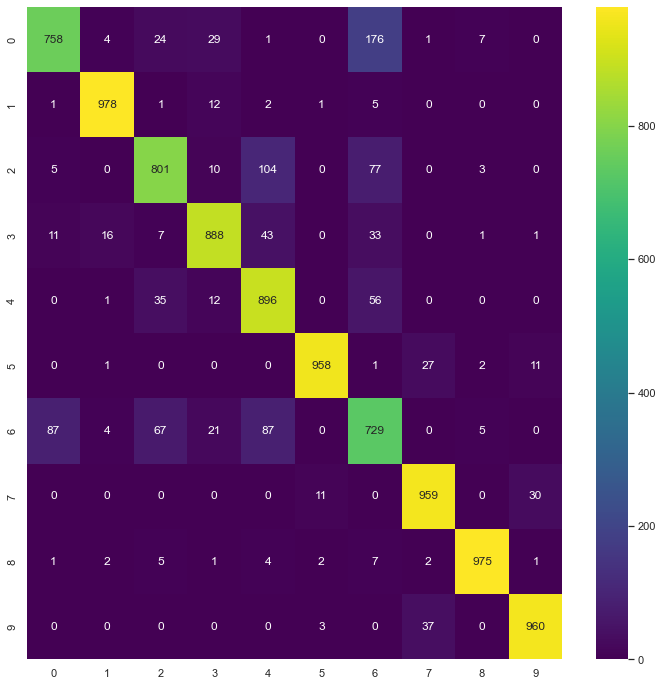

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predict_class)

fig = plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,cmap='viridis',fmt='d')

In [25]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test,predict_class,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.76      0.81      1000
     Class 1       0.97      0.98      0.98      1000
     Class 2       0.85      0.80      0.83      1000
     Class 3       0.91      0.89      0.90      1000
     Class 4       0.79      0.90      0.84      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.67      0.73      0.70      1000
     Class 7       0.93      0.96      0.95      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score

# Print result
accuracy = accuracy_score(y_test, predict_class)*100
print('\nAccuracy for model is equal ' + str(round(accuracy, 2)) + ' %.')

f1_score = f1_score(y_test, predict_class, average="macro")*100
print("The f1_score for model is equal " + str(round(f1_score, 2)) + ' %.')

recall_score = recall_score(y_test, predict_class, average="macro")*100
print("The recall for model is " + str(round(recall_score, 2)) + ' %.')


Accuracy for model is equal 89.02 %.
The f1_score for model is equal 89.07 %.
The recall for model is 89.02 %.
